# Chart Update Script

**MUST be stored in ROOT of chartstore repo (folder)**

In [11]:
# OPTIONAL - uncomment to use
# Update hongxiongmao from Github (only need if recent changes worth updating)
! pip install git+https://github.com/djmcnay/hongxiongmao#egg=hongxiongmao --upgrade

  Cloning https://github.com/djmcnay/hongxiongmao to /private/var/folders/6g/z_d85_5j1nxb1w_b3h9hzgz40000gn/T/pip-install-uynsg64t/hongxiongmao
  Running command git clone -q https://github.com/djmcnay/hongxiongmao /private/var/folders/6g/z_d85_5j1nxb1w_b3h9hzgz40000gn/T/pip-install-uynsg64t/hongxiongmao
  Stored in directory: /private/var/folders/6g/z_d85_5j1nxb1w_b3h9hzgz40000gn/T/pip-ephem-wheel-cache-j11v4z63/wheels/40/f0/13/cb7f72f4fee1e8b65e0e31689c582a05d9d84d7f2b7b07cc16
Successfully built hongxiongmao
  Found existing installation: hongxiongmao 0.1.dev0
    Uninstalling hongxiongmao-0.1.dev0:
      Successfully uninstalled hongxiongmao-0.1.dev0


In [12]:
import pickle
import numpy as np
import pandas as pd
import datetime
import plotly.offline as py

# HXM Dependencies
from hongxiongmao.download import alphavantage as av
from hongxiongmao import utilities

In [3]:
# POKEMON
from hongxiongmao import pokemon
p = pokemon.pokemon_go()
p.download_and_run()
p.plotlyplot()
py.plot(p.plot, filename='PlotlyHTMLexJS/pokemon.html',
        auto_open=False, include_plotlyjs='cdn', include_mathjax='cdn')

'PlotlyHTMLexJS/pokemon.html'

In [4]:
# Update US ETFs from AlphaVantage
dl = av()    # setup download class for av
x = dl.dl_from_ticker_dict(dl.us_etfs, output_size='full')   # pull 100d of daily data

# Picklemerge to Datastore & keep merger dict open
path = 'data'                    
filename = 'av_us_etfs_daily'
a = utilities.picklemerger(filename=filename, b=x, blend='left', path=path, create_new=True, output=True)

AlphaVantage call on ACWI downloaded
AlphaVantage call on SPY downloaded
AlphaVantage call on QQQ downloaded
AlphaVantage call on VEA downloaded
AlphaVantage call on IEMG downloaded
ERR: AlphaVantage call on VWO; retry in 5s
ERR: AlphaVantage call on VWO; retry in 10s
ERR: AlphaVantage call on VWO; retry in 15s
AlphaVantage call on VWO downloaded
AlphaVantage call on ASHR downloaded
AlphaVantage call on VNQ downloaded
AlphaVantage call on AGG downloaded
AlphaVantage call on GOVT downloaded
ERR: AlphaVantage call on TIP; retry in 5s
ERR: AlphaVantage call on TIP; retry in 10s
ERR: AlphaVantage call on TIP; retry in 15s
ERR: AlphaVantage call on TIP; retry in 20s
AlphaVantage call on TIP downloaded
AlphaVantage call on LQD downloaded
AlphaVantage call on HYG downloaded
AlphaVantage call on EMB downloaded
AlphaVantage call on EMLC downloaded
ERR: AlphaVantage call on GLD; retry in 5s
ERR: AlphaVantage call on GLD; retry in 10s
ERR: AlphaVantage call on GLD; retry in 15s
ERR: AlphaVantage 

In [5]:
from hongxiongmao import correlation

infile = open('data/av_us_etfs_daily', 'rb')
a = pickle.load(infile)
infile.close()

etfs=['SPY', 'VEA', 'VWO', 'GOVT', 'TIP', 'LQD', 'HYG', 'EMB', 'EMLC', 'GLD']
px = utilities.daily2weekly(a['close']).loc[:,etfs]

pdi = correlation.pdi(ts=px)
pdi.run(n=26)
py.plot(pdi.plot, filename='PlotlyHTMLexJS/principaldrivers.html',
        auto_open=False, auto_play=False, include_plotlyjs='cdn', include_mathjax='cdn')

'PlotlyHTMLexJS/principaldrivers.html'

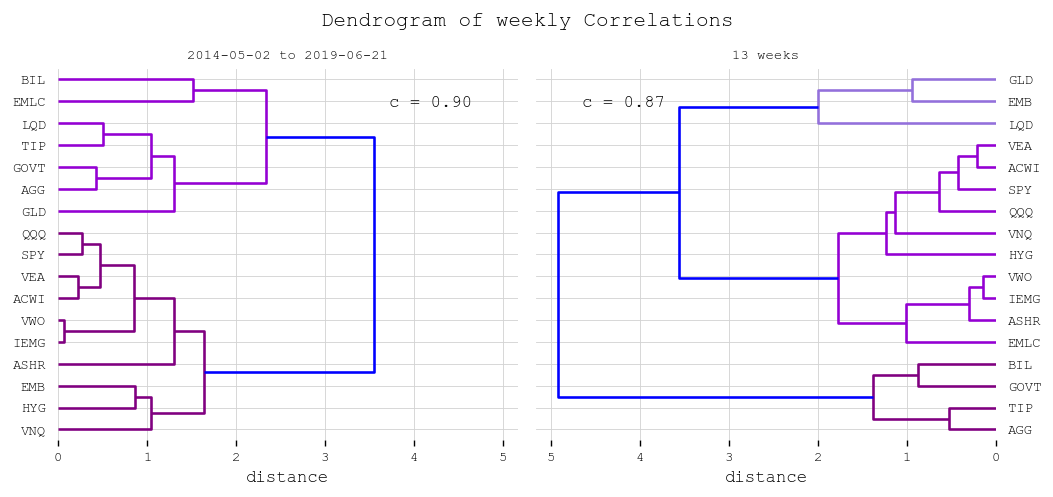

In [15]:
rtns = utilities.daily2weekly(a['close']).pct_change()
fig = correlation.mpl_duo_dendrogram(rtns, px=False)
fig.savefig('matplotlib/duodenrogram_etfs.png', bbox_inches='tight')

## Push to Github Repo

In [16]:
! git add ./*                  # add all files to git staging area
! git commit -m "auto update"
! git push origin master       # push to master branch

The following paths are ignored by one of your .gitignore files:
__pycache__
Use -f if you really want to add them.
[master 3f6381f] auto update
 2 files changed, 10 insertions(+), 10 deletions(-)
 create mode 100644 matplotlib/duodenrogram_etfs.png
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 626 bytes | 626.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/djmcnay/pandachartstore.git
   639cf30..3f6381f  master -> master
